In [1]:
import sys
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import json
import pathlib

src_dir = pathlib.Path().absolute().parent

# modify the sys.path to include the source directory
sys.path.append(str(src_dir))

from src.enums import DataSplit
from src.utils.visualize import plot_images_and_masks
from src.data.segmentation import BoxSegmentationDataset, LGGSegmentationDataset
from src.utils.transforms import DualInputCompose, DualInputTransform, DualInputResize

In [2]:
DATASETS_ROOT = src_dir / 'datasets'
BATCH_SIZE = 5
base_transform = DualInputTransform(transforms.ToTensor())

Data shapes:  torch.Size([5, 3, 640, 640]) torch.Size([5, 1, 640, 640])


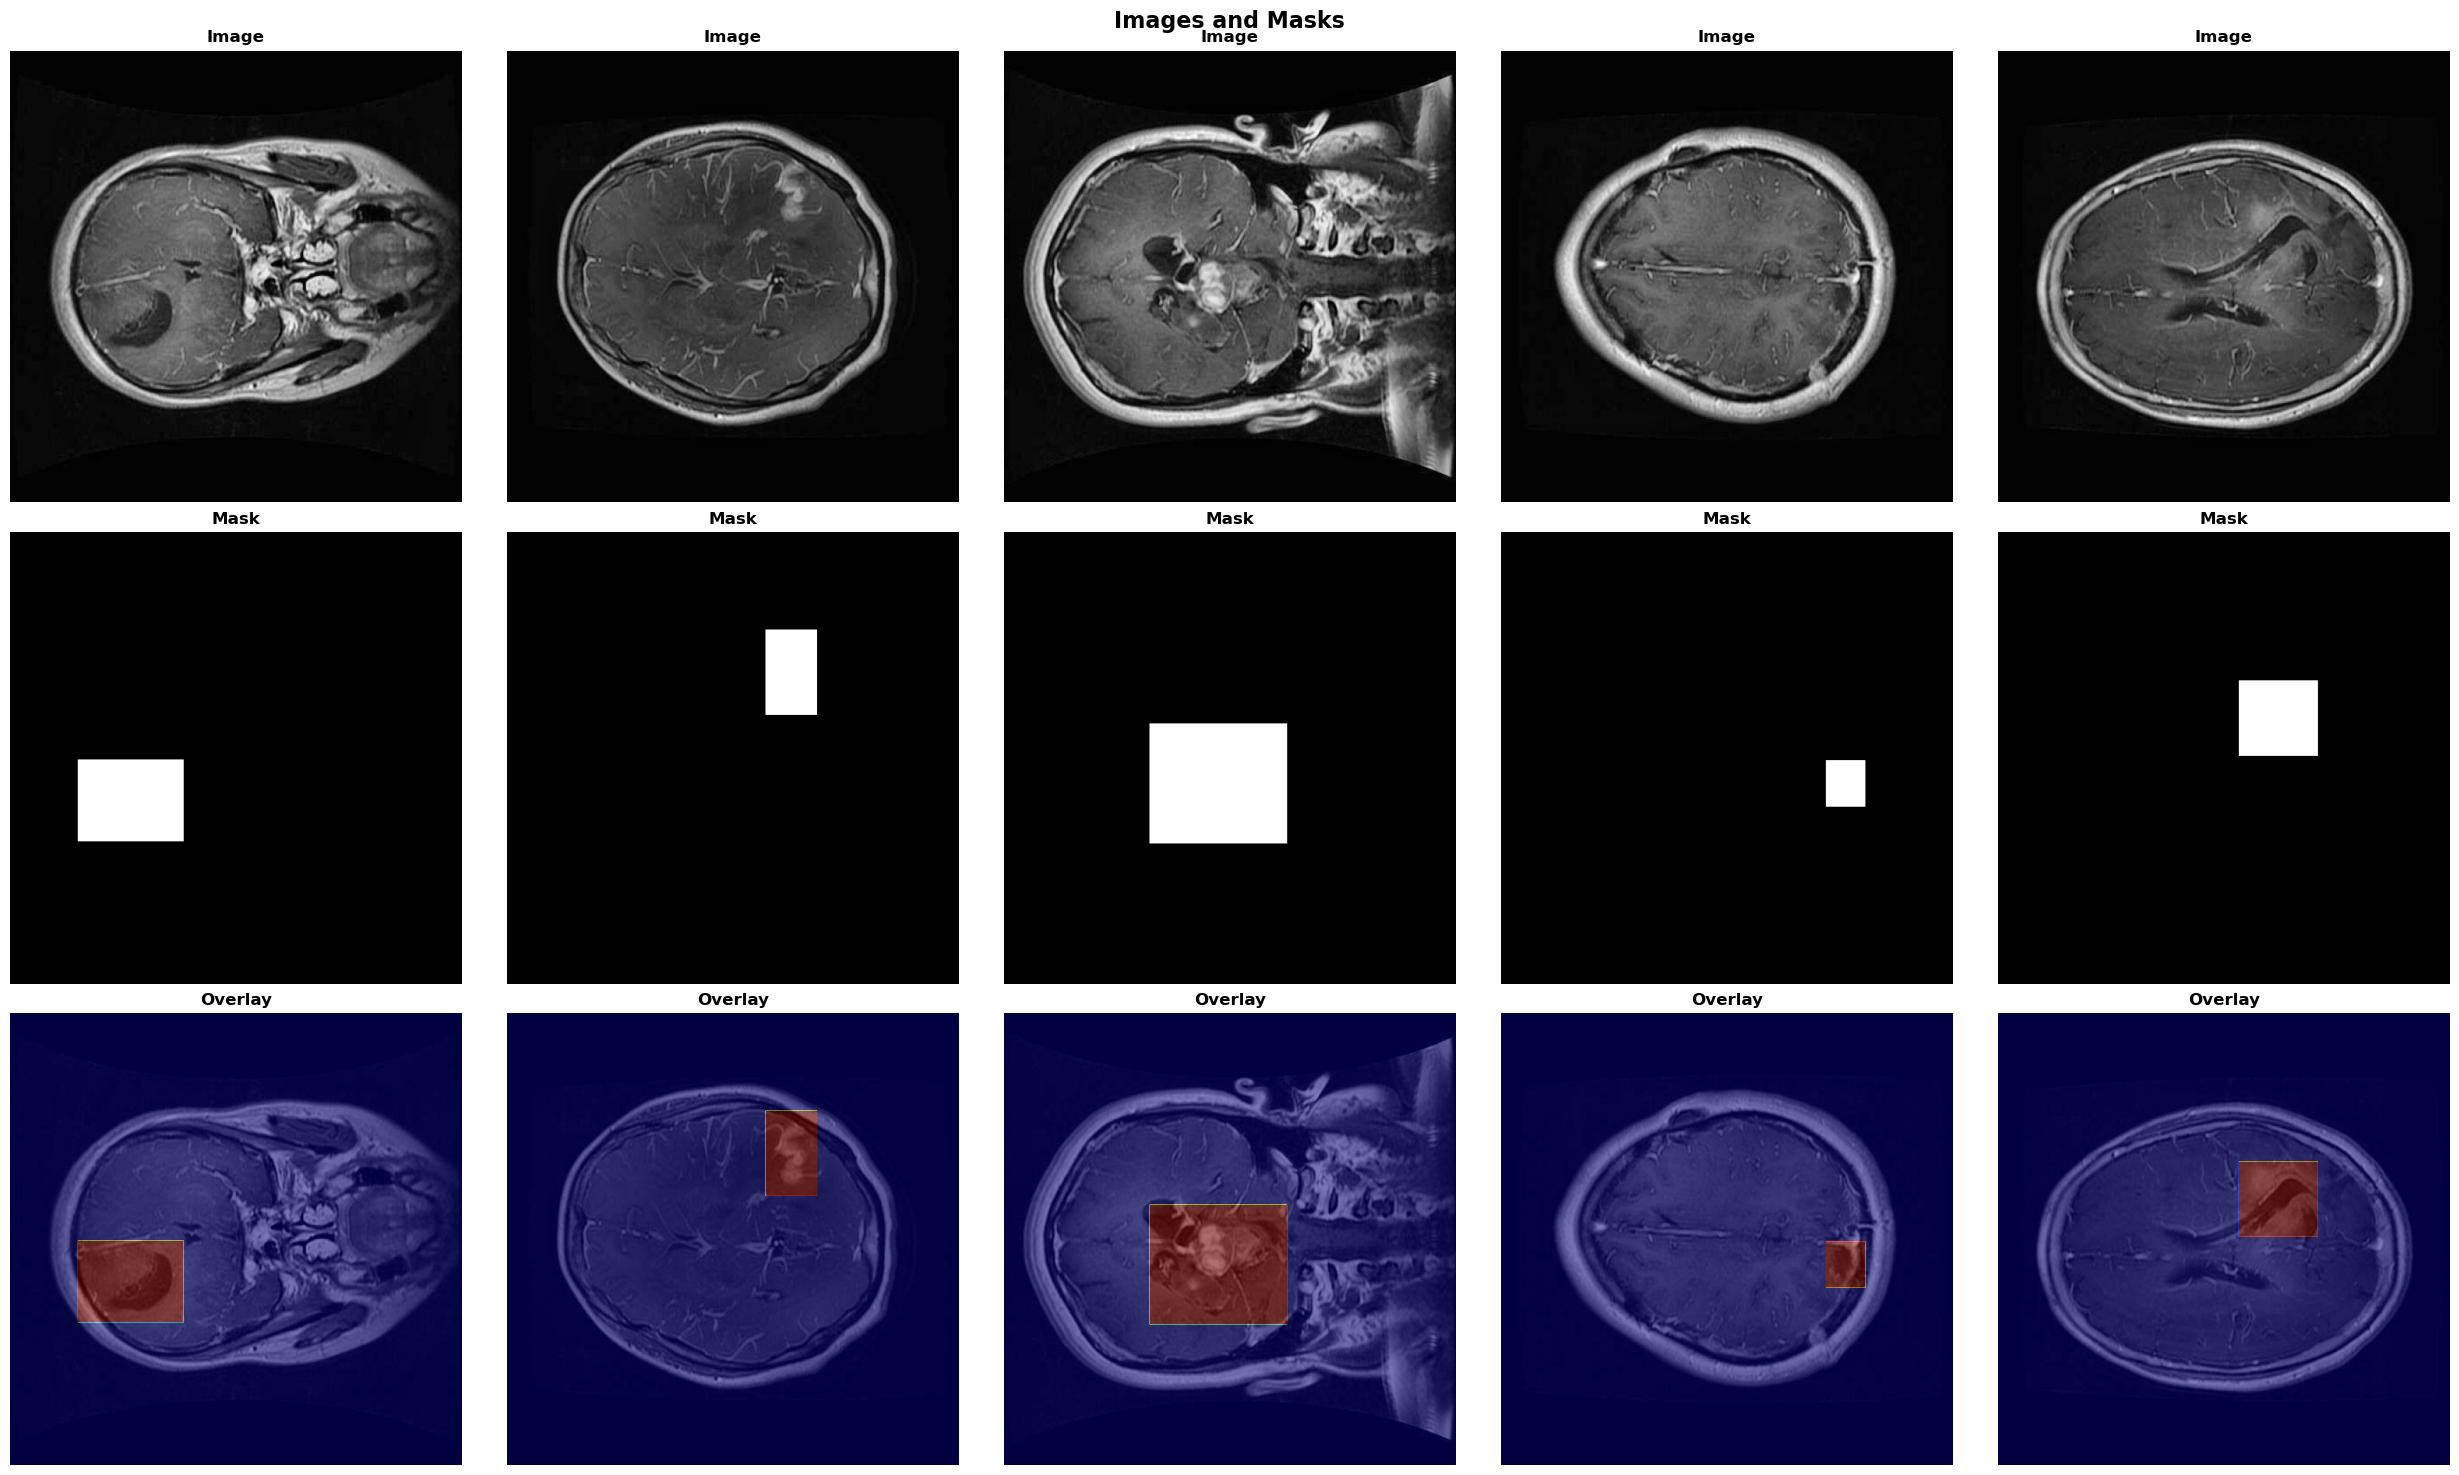

In [3]:
dataset = BoxSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=base_transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
images, masks = next(iter(data_loader)) # get a batch of data
print('Data shapes: ',images.shape, masks.shape)
plot_images_and_masks(images, masks)

Dataset length: 3143
Images shape: torch.Size([5, 3, 320, 320]), Masks shape: torch.Size([5, 1, 320, 320])


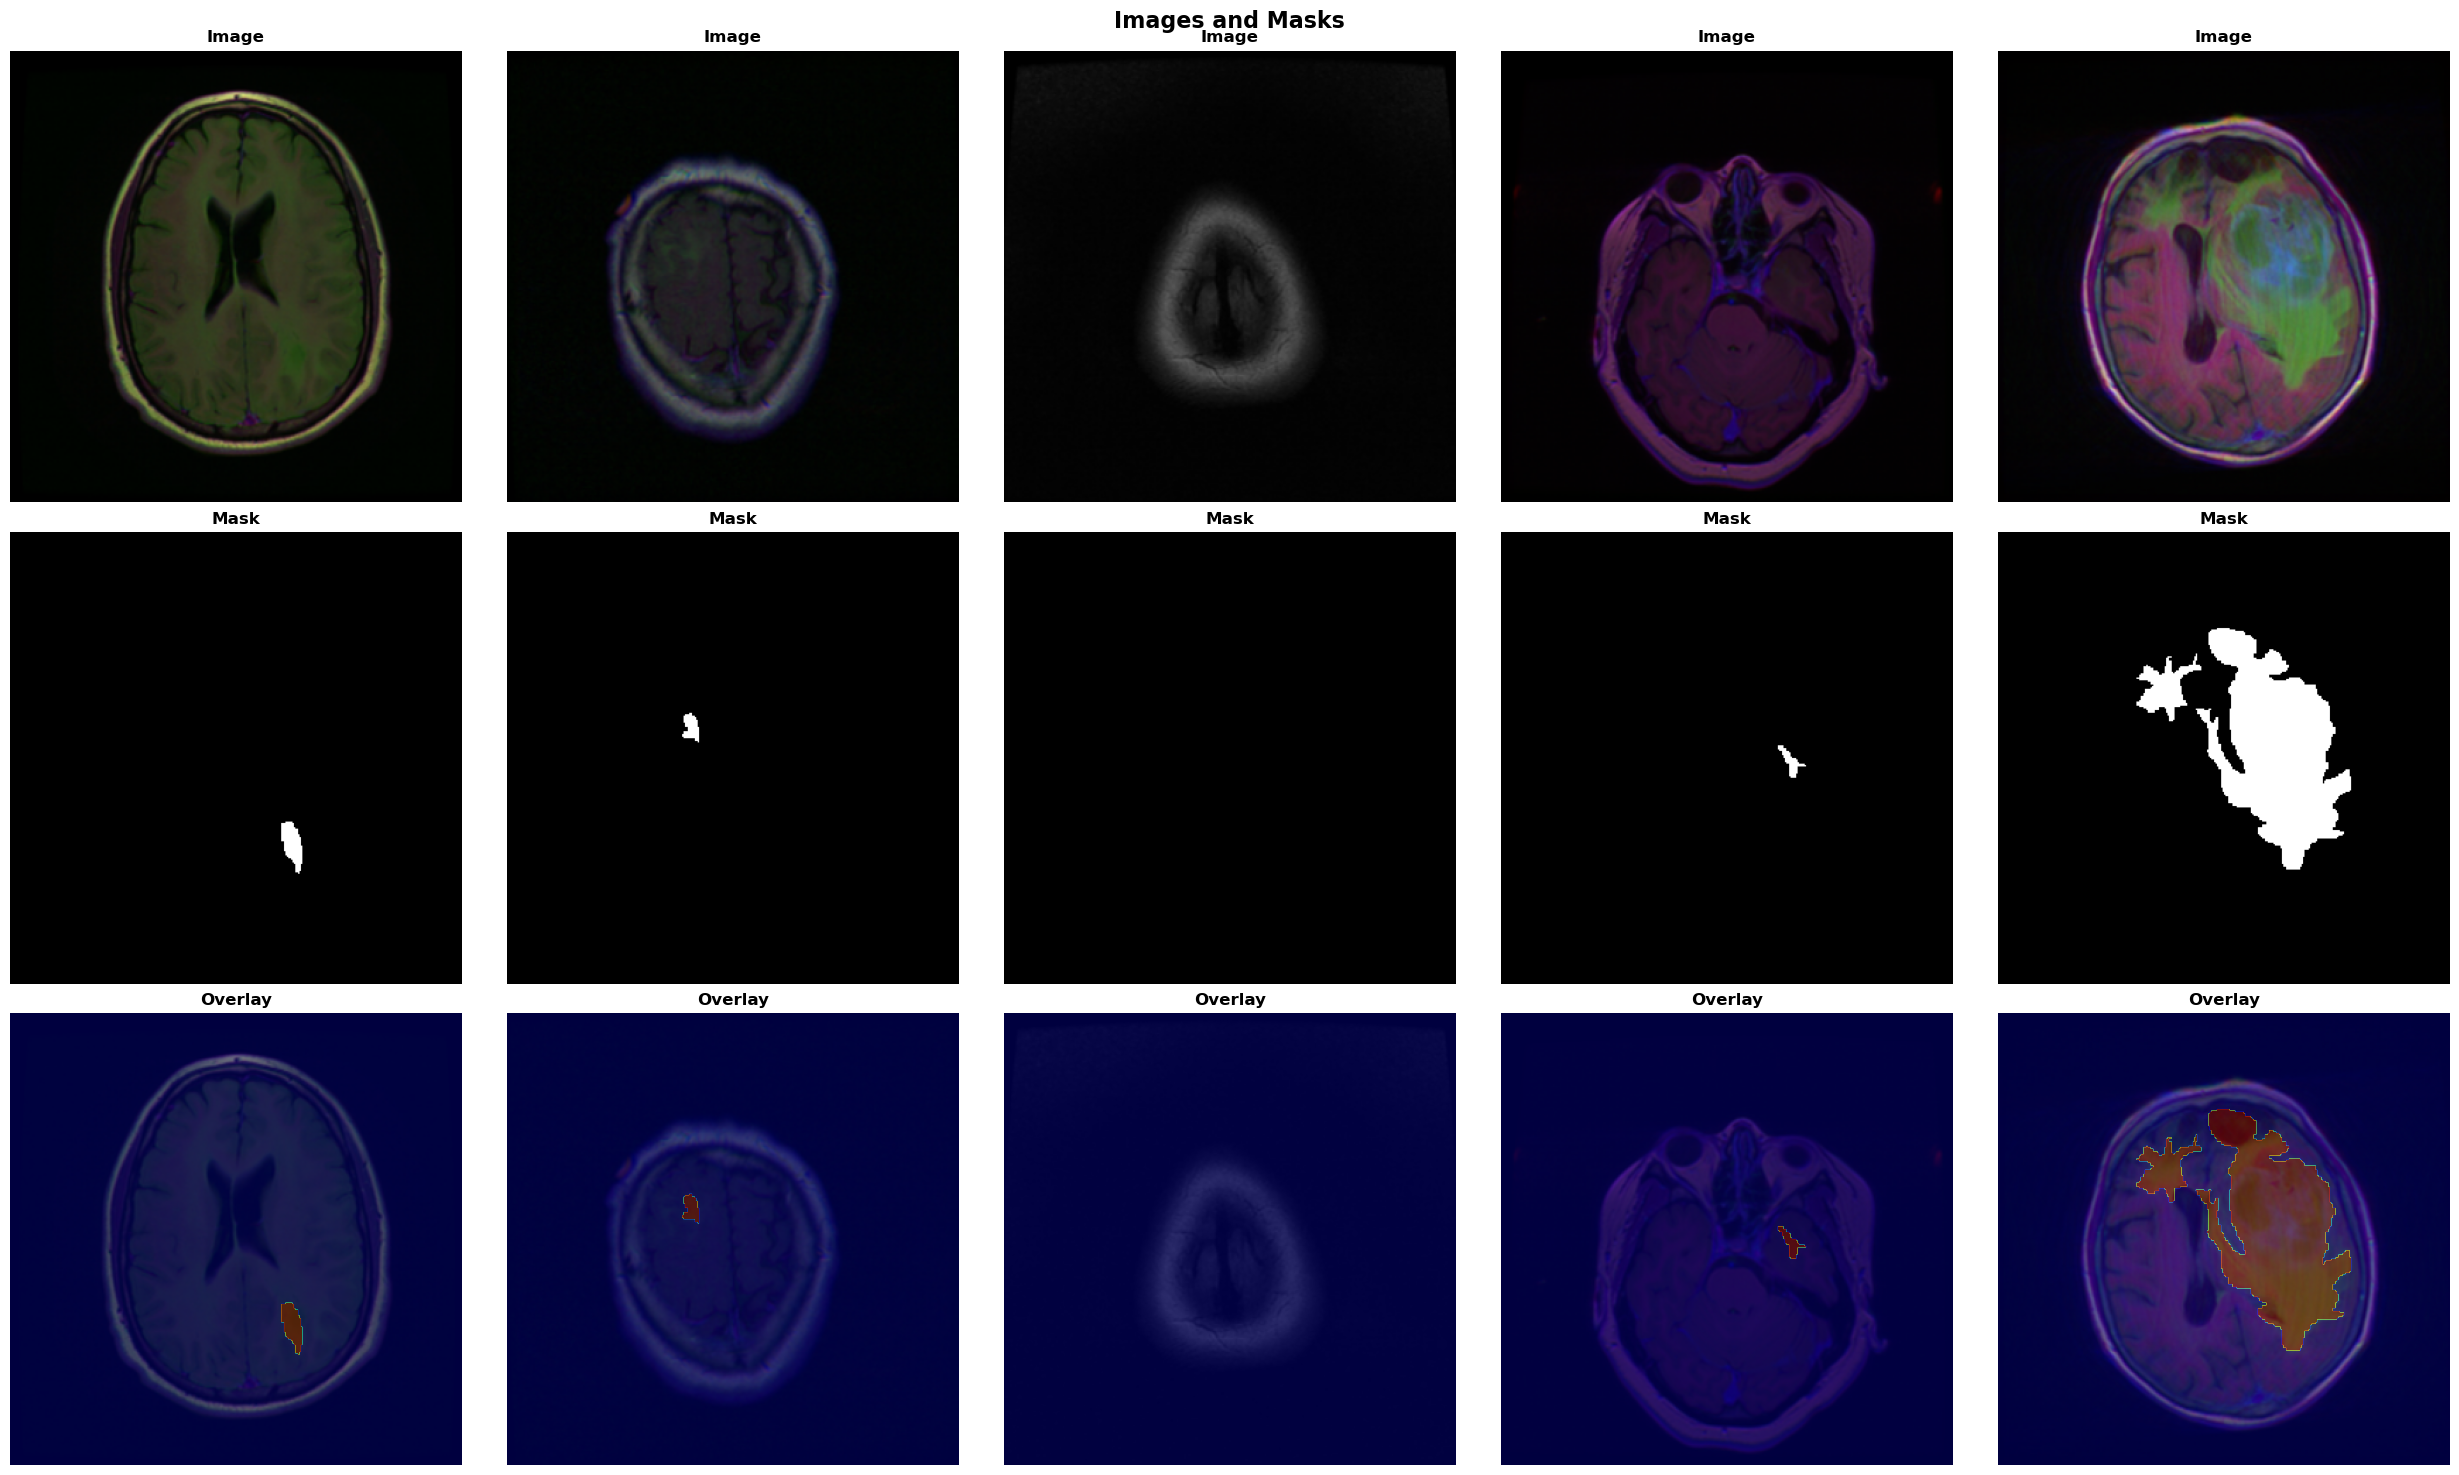

In [15]:
# Try resizing images to 320x320
resize_transform = DualInputCompose([
    DualInputResize((320, 320)),
    DualInputTransform(transforms.ToTensor())
])

dataset = LGGSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=resize_transform)
print(f'Dataset length: {len(dataset)}')
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
images, masks = next(iter(data_loader)) # get a batch of data
print(f'Images shape: {images.shape}, Masks shape: {masks.shape}')
plot_images_and_masks(images, masks)